<a href="https://colab.research.google.com/github/abhinayareddy1930/Japaneese-Handwritten-images-prediction-using-FeedForwardNN-/blob/main/KKanji_Dataset_146.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install deeplake


In [ ]:

!pip uninstall -y deeplake
!pip install "deeplake<4"




Found existing installation: deeplake 4.1.11
Uninstalling deeplake-4.1.11:
  Successfully uninstalled deeplake-4.1.11
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 639.9/639.9 kB 8.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.1/78.1 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 38.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 48.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 31.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.3/144.3 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

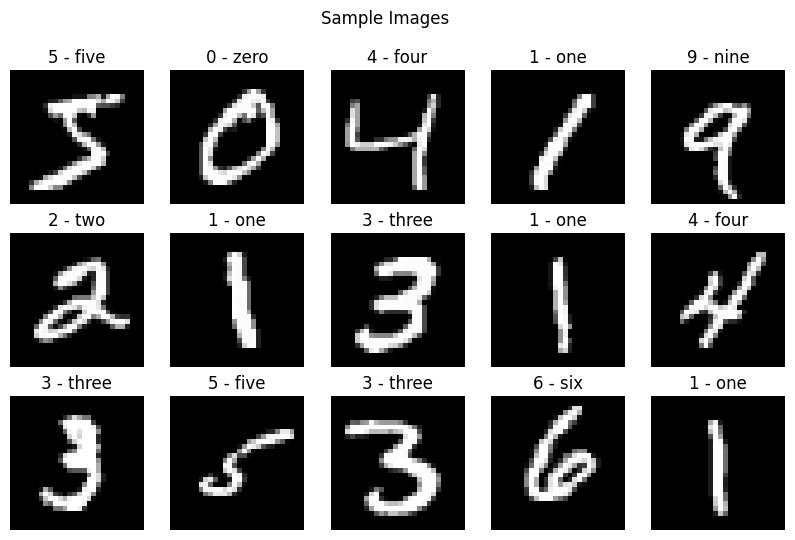


Training with sgd optimizer
Epoch 1: Validation Accuracy = 22.87%
Epoch 2: Validation Accuracy = 38.52%
Epoch 3: Validation Accuracy = 52.31%
Epoch 4: Validation Accuracy = 66.37%
Epoch 5: Validation Accuracy = 76.93%
Test Accuracy: 77.60%

Training with momentum optimizer
Epoch 1: Validation Accuracy = 91.39%
Epoch 2: Validation Accuracy = 94.33%
Epoch 3: Validation Accuracy = 95.27%
Epoch 4: Validation Accuracy = 95.59%
Epoch 5: Validation Accuracy = 96.01%
Test Accuracy: 96.25%

Training with nesterov optimizer
Epoch 1: Validation Accuracy = 92.19%
Epoch 2: Validation Accuracy = 93.65%
Epoch 3: Validation Accuracy = 94.52%
Epoch 4: Validation Accuracy = 95.62%
Epoch 5: Validation Accuracy = 95.77%
Test Accuracy: 96.23%

Training with rmsprop optimizer
Epoch 1: Validation Accuracy = 90.69%
Epoch 2: Validation Accuracy = 93.58%
Epoch 3: Validation Accuracy = 94.69%
Epoch 4: Validation Accuracy = 93.82%
Epoch 5: Validation Accuracy = 95.12%
Test Accuracy: 95.67%

Training with adam op

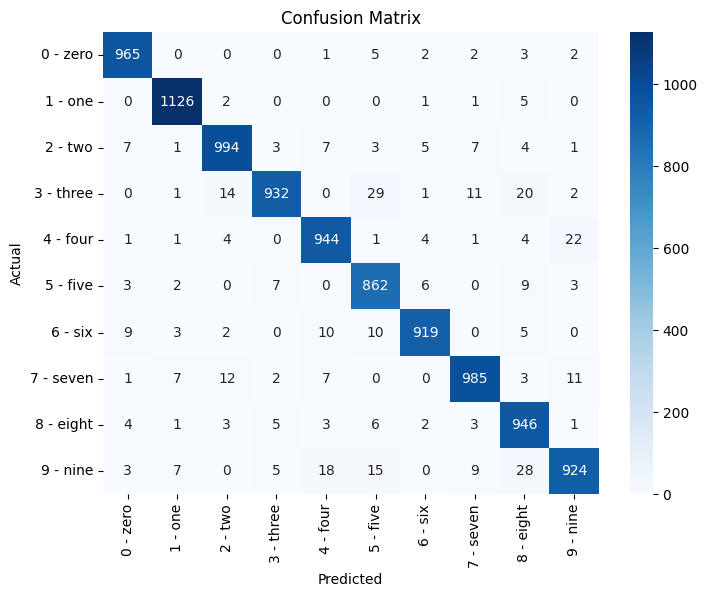


Training with CrossEntropyLoss
Epoch 1: Validation Accuracy = 92.12%
Epoch 2: Validation Accuracy = 93.41%
Epoch 3: Validation Accuracy = 94.54%
Epoch 4: Validation Accuracy = 94.90%
Epoch 5: Validation Accuracy = 95.52%
Test Accuracy: 95.86%

Training with MSELoss


/usr/local/lib/python3.11/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([32])) that is different to the input size (torch.Size([32, 10])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


RuntimeError: The size of tensor a (10) must match the size of tensor b (32) at non-singleton dimension 1

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from torch.utils.data import DataLoader, random_split
import copy
from sklearn.metrics import confusion_matrix

def plot_images(images, labels, classes, title):
    fig, axes = plt.subplots(3, 5, figsize=(10, 6))
    axes = axes.flatten()
    for img, label, ax in zip(images, labels, axes):
        img = img.squeeze().numpy()
        ax.imshow(img, cmap='gray')
        ax.set_title(classes[label])
        ax.axis('off')
    plt.suptitle(title)
    plt.show()

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
class_names = dataset.classes
plot_images([dataset[i][0] for i in range(15)], [dataset[i][1] for i in range(15)], class_names, "Sample Images")

train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)

batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

class NeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_layers, hidden_units, output_size, activation):
        super(NeuralNetwork, self).__init__()
        layers = []
        layers.append(nn.Linear(input_size, hidden_units))
        layers.append(nn.ReLU() if activation == 'relu' else nn.Sigmoid())
        for _ in range(hidden_layers - 1):
            layers.append(nn.Linear(hidden_units, hidden_units))
            layers.append(nn.ReLU() if activation == 'relu' else nn.Sigmoid())
        layers.append(nn.Linear(hidden_units, output_size))
        self.model = nn.Sequential(*layers)
    def forward(self, x):
        return self.model(x.view(x.size(0), -1))

def train_model(model, train_loader, val_loader, loss_fn, optimizer, epochs=5):
    for epoch in range(epochs):
        model.train()
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = loss_fn(outputs, labels)
            loss.backward()
            optimizer.step()
        model.eval()
        correct, total = 0, 0
        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                _, predicted = torch.max(outputs, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
        print(f'Epoch {epoch+1}: Validation Accuracy = {100 * correct / total:.2f}%')

def test_model(model, test_loader):
    model.eval()
    correct, total = 0, 0
    all_preds, all_labels = [], []
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
    acc = 100 * correct / total
    print(f'Test Accuracy: {acc:.2f}%')
    return acc, all_preds, all_labels

def plot_confusion_matrix(labels, preds, classes):
    cm = confusion_matrix(labels, preds)
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
input_size = 28 * 28
output_size = 10

optimizers = {
    "sgd": optim.SGD,
    "momentum": lambda params: optim.SGD(params, lr=0.01, momentum=0.9),
    "nesterov": lambda params: optim.SGD(params, lr=0.01, momentum=0.9, nesterov=True),
    "rmsprop": lambda params: optim.RMSprop(params, lr=0.001),
    "adam": lambda params: optim.Adam(params, lr=0.001)
}

best_acc = 0
best_model = None
for name, opt_fn in optimizers.items():
    model = NeuralNetwork(input_size, hidden_layers=3, hidden_units=64, output_size=output_size, activation='relu').to(device)
    optimizer = opt_fn(model.parameters())
    print(f'\nTraining with {name} optimizer')
    train_model(model, train_loader, val_loader, nn.CrossEntropyLoss(), optimizer, epochs=5)
    acc, preds, labels = test_model(model, test_loader)
    if acc > best_acc:
        best_acc = acc
        best_model = copy.deepcopy(model)

plot_confusion_matrix(labels, preds, class_names)

for loss_fn in [nn.CrossEntropyLoss(), nn.MSELoss()]:
    model = NeuralNetwork(input_size, hidden_layers=3, hidden_units=64, output_size=output_size, activation='relu').to(device)
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    print(f'\nTraining with {loss_fn.__class__.__name__}')
    train_model(model, train_loader, val_loader, loss_fn, optimizer, epochs=5)
    test_model(model, test_loader)


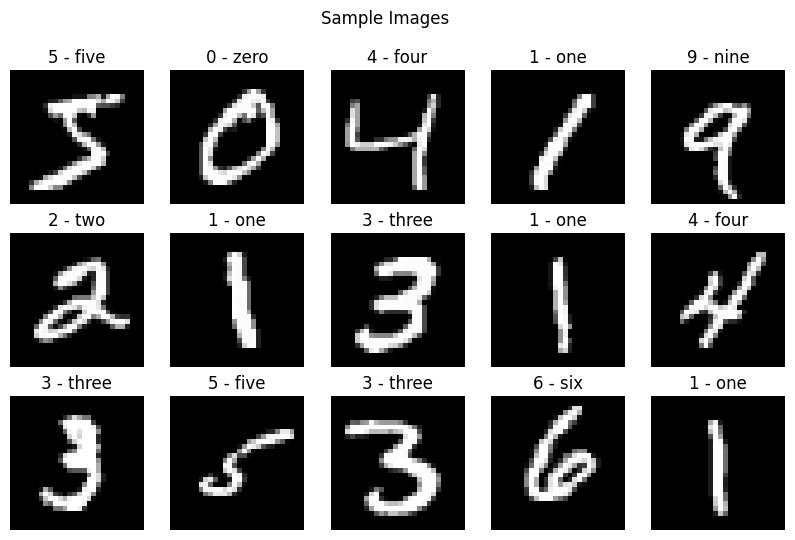


Training with sgd optimizer
Epoch 1: Validation Accuracy = 30.82%
Epoch 2: Validation Accuracy = 39.53%
Epoch 3: Validation Accuracy = 51.82%
Epoch 4: Validation Accuracy = 69.38%
Epoch 5: Validation Accuracy = 77.28%
Test Accuracy: 77.84%

Training with momentum optimizer
Epoch 1: Validation Accuracy = 92.72%
Epoch 2: Validation Accuracy = 94.97%
Epoch 3: Validation Accuracy = 94.46%
Epoch 4: Validation Accuracy = 95.97%
Epoch 5: Validation Accuracy = 95.62%
Test Accuracy: 95.99%

Training with nesterov optimizer
Epoch 1: Validation Accuracy = 93.05%
Epoch 2: Validation Accuracy = 94.85%
Epoch 3: Validation Accuracy = 95.77%
Epoch 4: Validation Accuracy = 95.64%
Epoch 5: Validation Accuracy = 96.50%
Test Accuracy: 96.82%

Training with rmsprop optimizer
Epoch 1: Validation Accuracy = 92.92%
Epoch 2: Validation Accuracy = 94.23%
Epoch 3: Validation Accuracy = 94.99%
Epoch 4: Validation Accuracy = 95.07%
Epoch 5: Validation Accuracy = 96.22%
Test Accuracy: 96.26%

Training with adam op

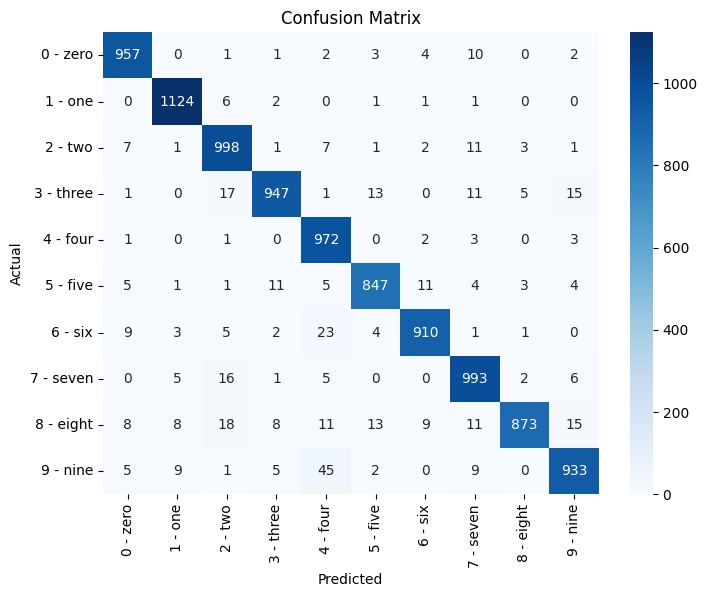


Training with CrossEntropyLoss
Epoch 1: Validation Accuracy = 92.31%
Epoch 2: Validation Accuracy = 94.51%
Epoch 3: Validation Accuracy = 94.92%
Epoch 4: Validation Accuracy = 95.03%
Epoch 5: Validation Accuracy = 96.01%
Test Accuracy: 95.83%

Training with MSELoss
Epoch 1: Validation Accuracy = 93.63%
Epoch 2: Validation Accuracy = 94.71%
Epoch 3: Validation Accuracy = 95.48%
Epoch 4: Validation Accuracy = 94.54%
Epoch 5: Validation Accuracy = 95.24%
Test Accuracy: 95.18%


In [11]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from torch.utils.data import DataLoader, random_split
import copy
from sklearn.metrics import confusion_matrix

def plot_images(images, labels, classes, title):
    fig, axes = plt.subplots(3, 5, figsize=(10, 6))
    axes = axes.flatten()
    for img, label, ax in zip(images, labels, axes):
        img = img.squeeze().numpy()
        ax.imshow(img, cmap='gray')
        ax.set_title(classes[label])
        ax.axis('off')
    plt.suptitle(title)
    plt.show()

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
class_names = dataset.classes
plot_images([dataset[i][0] for i in range(15)], [dataset[i][1] for i in range(15)], class_names, "Sample Images")

train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)

batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

class NeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_layers, hidden_units, output_size, activation):
        super(NeuralNetwork, self).__init__()
        layers = [nn.Linear(input_size, hidden_units), nn.ReLU() if activation == 'relu' else nn.Sigmoid()]
        for _ in range(hidden_layers - 1):
            layers.append(nn.Linear(hidden_units, hidden_units))
            layers.append(nn.ReLU() if activation == 'relu' else nn.Sigmoid())
        layers.append(nn.Linear(hidden_units, output_size))
        self.model = nn.Sequential(*layers)

    def forward(self, x):
        return self.model(x.view(x.size(0), -1))

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
input_size = 28 * 28
output_size = 10

optimizers = {
    "sgd": optim.SGD,
    "momentum": lambda params: optim.SGD(params, lr=0.01, momentum=0.9),
    "nesterov": lambda params: optim.SGD(params, lr=0.01, momentum=0.9, nesterov=True),
    "rmsprop": lambda params: optim.RMSprop(params, lr=0.001),
    "adam": lambda params: optim.Adam(params, lr=0.001)
}

def train_model(model, train_loader, val_loader, loss_fn, optimizer, epochs=5):
    for epoch in range(epochs):
        model.train()
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            if isinstance(loss_fn, nn.MSELoss):
                labels = torch.nn.functional.one_hot(labels, num_classes=output_size).float()
            optimizer.zero_grad()
            outputs = model(images)
            loss = loss_fn(outputs, labels)
            loss.backward()
            optimizer.step()
        model.eval()
        correct, total = 0, 0
        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                _, predicted = torch.max(outputs, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
        print(f'Epoch {epoch+1}: Validation Accuracy = {100 * correct / total:.2f}%')

def test_model(model, test_loader):
    model.eval()
    correct, total = 0, 0
    all_preds, all_labels = [], []
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
    acc = 100 * correct / total
    print(f'Test Accuracy: {acc:.2f}%')
    return acc, all_preds, all_labels

def plot_confusion_matrix(labels, preds, classes):
    cm = confusion_matrix(labels, preds)
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

best_acc = 0
best_model = None
for name, opt_fn in optimizers.items():
    model = NeuralNetwork(input_size, hidden_layers=3, hidden_units=64, output_size=output_size, activation='sigmoid').to(device)
    optimizer = opt_fn(model.parameters())
    print(f'\nTraining with {name} optimizer')
    train_model(model, train_loader, val_loader, nn.CrossEntropyLoss(), optimizer, epochs=5)
    acc, preds, labels = test_model(model, test_loader)
    if acc > best_acc:
        best_acc = acc
        best_model = copy.deepcopy(model)

plot_confusion_matrix(labels, preds, class_names)

for loss_fn in [nn.CrossEntropyLoss(), nn.MSELoss()]:
    model = NeuralNetwork(input_size, hidden_layers=3, hidden_units=64, output_size=output_size, activation='relu').to(device)
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    print(f'\nTraining with {loss_fn.__class__.__name__}')
    train_model(model, train_loader, val_loader, loss_fn, optimizer, epochs=5)
    test_model(model, test_loader)


Epoch 1 - CrossEntropyLoss Loss: 0.4466
Epoch 2 - CrossEntropyLoss Loss: 0.2226
Epoch 3 - CrossEntropyLoss Loss: 0.1715
Epoch 4 - CrossEntropyLoss Loss: 0.1442
Epoch 5 - CrossEntropyLoss Loss: 0.1269
Epoch 1 - MSELoss Loss: 0.0201
Epoch 2 - MSELoss Loss: 0.0111
Epoch 3 - MSELoss Loss: 0.0092
Epoch 4 - MSELoss Loss: 0.0080
Epoch 5 - MSELoss Loss: 0.0072


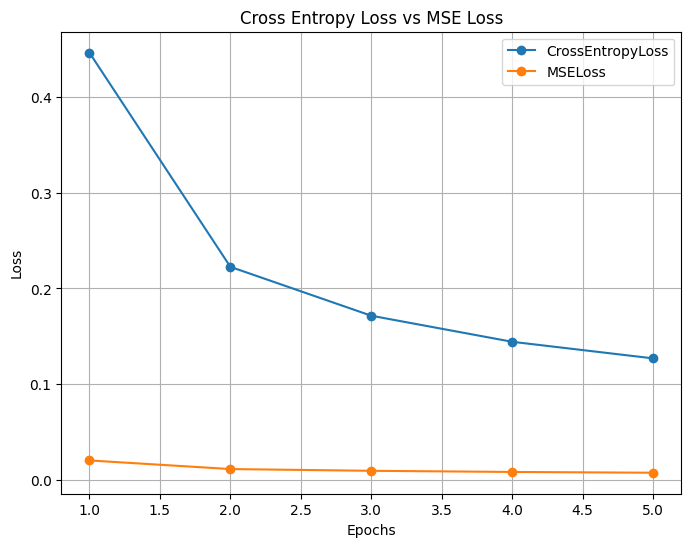

In [12]:

loss_history = {"CrossEntropyLoss": [], "MSELoss": []}


for loss_fn in [nn.CrossEntropyLoss(), nn.MSELoss()]:
    model = NeuralNetwork(input_size, hidden_layers=3, hidden_units=64, output_size=output_size, activation='relu').to(device)
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    losses = []

    for epoch in range(5):
        model.train()
        epoch_loss = 0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            if isinstance(loss_fn, nn.MSELoss):
                labels = torch.nn.functional.one_hot(labels, num_classes=output_size).float()
            optimizer.zero_grad()
            outputs = model(images)
            loss = loss_fn(outputs, labels)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()
        avg_loss = epoch_loss / len(train_loader)
        losses.append(avg_loss)
        print(f'Epoch {epoch+1} - {loss_fn.__class__.__name__} Loss: {avg_loss:.4f}')

    loss_history[loss_fn.__class__.__name__] = losses


plt.figure(figsize=(8, 6))
for loss_type, losses in loss_history.items():
    plt.plot(range(1, 6), losses, marker='o', label=loss_type)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Cross Entropy Loss vs MSE Loss")
plt.legend()
plt.grid()
plt.show()
